In [1]:
import mimetypes
import datetime
import requests
import datetime
import base64
import json
import io
from PIL import Image

In [3]:
REST_API_URL = "http://127.0.0.1:5010/process" # for local dev
IMAGE_PATH = "../images/beach.jpg" # example image
#IMAGE_PATH = "../../image_tagger/images/2Persons.jpg"

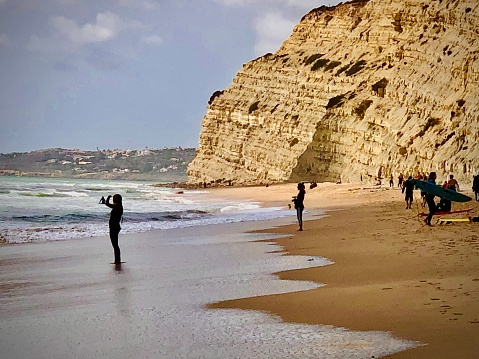

In [4]:
from IPython.display import Image
display(Image(filename=IMAGE_PATH))

In [5]:
with open(IMAGE_PATH, "rb") as f:
    im_bytes = f.read()        
im_b64 = base64.b64encode(im_bytes).decode("utf8")

In [6]:
with open("../test_docs/ocr_1_file.json", "r") as f:
    list_docs = json.load(f)

In [11]:
list_docs['documents'][0]['source']['content'] = im_b64
list_docs['documents'][0]['source']['file_name'] = "beach.jpeg"
list_docs['documents'][0]['source']['file_type'] = "jpeg"
list_docs['documents'][0]['source']['fs'] ['uri']= 'file:///home/demofilesystem/test_data/Large%20Control%20DataSet/Office%20Files%20and%20Documents/images/beach.jpeg'
list_docs['prompt'] = "MORE_DETAILED_CAPTION"

In [12]:
with open("../test_docs/image_beach_file.json", "w") as f:
    json.dump(list_docs,f,  indent=4)

In [13]:
data1 = json.dumps(list_docs).encode()

In [14]:
try:
    r = requests.post(REST_API_URL, data=data1)#files=files)
    print(r.json())
finally:

    pass

{'status': {'code': 200, 'message': 'Success'}, 'data': [{'id': '7587bcb2-4ea6-4a64-a426-040b40bf414b', 'index': 'large_control_dataset-doc', 'source': {'content': ['Image Summary for beach.jpeg is : A woman is standing on the wet sand of a beach. There is a large rock formation on the right of the beach. The woman is wearing a black wet suit. There are many people standing near the rock formation. The sky is blue with white clouds. The water is crashing on the sand of the sand. The waves in the water are white.'], 'fs': {'uri': 'file:///home/demofilesystem/test_data/Large%20Control%20DataSet/Office%20Files%20and%20Documents/images/beach.jpeg'}, 'file_name': 'beach.jpeg', 'file_type': 'jpeg', 'embedded_depth': 0}}], 'error': '', 'number_documents_treated': 1, 'number_documents_non_treated': 0, 'list_id_not_treated': [], 'memory_used': '21.2', 'ram_used': '6.65'}


In [15]:
print(r.json()['error'])

In [16]:
r.json()['data'][0]['source']['content']

['Image Summary for beach.jpeg is : A woman is standing on the wet sand of a beach. There is a large rock formation on the right of the beach. The woman is wearing a black wet suit. There are many people standing near the rock formation. The sky is blue with white clouds. The water is crashing on the sand of the sand. The waves in the water are white.']